In [1]:
import cv2
import numpy as np
import sys
from random import random
from matplotlib import pyplot as plt
from skimage.io import imread, imshow 

Загружаем изображение

(480, 480, 3)


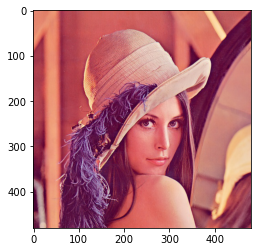

In [2]:
image = cv2.imread('C:\Face.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(image.shape)

## Cвертка с 5 фильтрами 3x3x3

In [3]:
weights = np.random.uniform(size = (5,3,3,3))
B = [random() for i in range(5)]
after_conv = np.zeros((image.shape[0]-2, image.shape[1]-2, 5), 'float')
for i in range(image.shape[0]-2):
    for j in range(image.shape[1]-2):        
        for M in range(5):
            after_conv[i][j][M] = B[M]
            for K in range(3):
                for J in range(3):
                    for I in range(3):
                        after_conv[i][j][M] += [weights[M][I][J][K] * image[i + I][j + J][K]]

Выведем результат:

In [4]:
print("CONV", after_conv.shape, after_conv, sep="\n")

CONV
(478, 478, 5)
[[[2025.95044988 1922.46040597 1990.94246212 2248.09718875 2314.59716586]
  [2039.09700661 1925.49399388 2001.71335629 2258.85435684 2324.39075025]
  [2055.49949638 1936.52209164 2014.87726336 2266.09851448 2336.82194334]
  ...
  [1766.10638979 1695.83668926 1726.28229532 1952.91320167 2027.43149168]
  [1674.20452643 1621.16798487 1646.1338317  1831.84330395 1924.19952962]
  [1473.87763113 1483.05028692 1471.18951721 1612.08987312 1727.47054919]]

 [[2036.10790451 1924.39246171 1998.08503532 2248.26946276 2321.9983263 ]
  [2045.44906218 1924.39867449 2002.46483801 2256.06645307 2323.32448228]
  [2054.20407821 1934.75291762 2011.6600359  2264.14684088 2332.21374017]
  ...
  [1669.02221098 1609.8005313  1643.77765186 1837.08466358 1906.33130422]
  [1518.29433089 1500.8902031  1507.94390274 1674.0125326  1750.77571765]
  [1267.17677377 1308.88930609 1290.9959856  1422.64585039 1512.17601327]]

 [[2043.58103726 1929.83356003 2000.48191062 2253.19677665 2328.04167391]
  [

## Нормализация

In [5]:
after_norm = np.zeros(after_conv.shape,'float')
a = [random() for i in range(5)]
b = [random() for i in range(5)]
for M in range(5):
    mean = np.mean(after_conv[:,:,M])
    std = np.std(after_conv[:,:,M])
    after_norm[:,:,M] = a[M]*(after_conv[:,:,M]-mean)/std + b[M]

Выведем результат:

In [6]:
print("NORMALIZE", after_norm.shape, after_norm, sep="\n")

NORMALIZE
(478, 478, 5)
[[[ 0.51125997  0.76823105  0.8585816   0.43207534  1.14622548]
  [ 0.51865654  0.76935164  0.85889278  0.43984618  1.15959187]
  [ 0.52788498  0.77342536  0.8592731   0.44507927  1.17655809]
  ...
  [ 0.36506538  0.6845174   0.85093532  0.21883822  0.75429879]
  [ 0.31335915  0.65693516  0.84861976  0.13137889  0.61340674]
  [ 0.20065037  0.60591519  0.84356545 -0.02736817  0.34490898]]

 [[ 0.5169748   0.76894474  0.85878796  0.43219979  1.15632666]
  [ 0.52223036  0.76894703  0.85891449  0.43783223  1.15813662]
  [ 0.52715615  0.77277184  0.85918015  0.4436694   1.17026877]
  ...
  [ 0.31044346  0.65273608  0.84855169  0.13516518  0.58902   ]
  [ 0.22564028  0.61250516  0.84462732  0.01736397  0.37671612]
  [ 0.08435544  0.54158101  0.8383595  -0.16422009  0.05107276]]

 [[ 0.52117937  0.77095465  0.85885721  0.43575922  1.16457469]
  [ 0.52477978  0.7732779   0.85903652  0.44381887  1.17199267]
  [ 0.5283248   0.77569772  0.85934282  0.45058865  1.18253731]


## ReLU

In [7]:
after_relu = np.zeros(after_norm.shape, dtype=np.float32)
for m in range(after_relu.shape[0]):
    for i in range(after_relu.shape[1]):
        for j in range(after_relu.shape[2]):
            after_relu[m, i, j] = max(0, after_norm[m, i, j])

Выведем результат:

In [8]:
print("ReLU", after_relu.shape, after_relu, sep="\n")

ReLU
(478, 478, 5)
[[[0.51126    0.76823103 0.8585816  0.43207535 1.1462255 ]
  [0.51865655 0.76935166 0.8588928  0.4398462  1.1595919 ]
  [0.52788496 0.77342534 0.8592731  0.44507927 1.1765581 ]
  ...
  [0.36506537 0.6845174  0.85093534 0.21883823 0.7542988 ]
  [0.31335914 0.65693516 0.84861976 0.13137889 0.6134067 ]
  [0.20065036 0.6059152  0.84356546 0.         0.34490898]]

 [[0.5169748  0.76894474 0.85878795 0.43219978 1.1563267 ]
  [0.5222304  0.768947   0.8589145  0.43783224 1.1581366 ]
  [0.5271562  0.77277184 0.85918015 0.4436694  1.1702688 ]
  ...
  [0.31044346 0.65273607 0.8485517  0.13516518 0.58902   ]
  [0.22564028 0.61250514 0.8446273  0.01736397 0.3767161 ]
  [0.08435544 0.54158103 0.8383595  0.         0.05107276]]

 [[0.5211794  0.77095467 0.8588572  0.43575922 1.1645747 ]
  [0.5247798  0.7732779  0.8590365  0.44381887 1.1719927 ]
  [0.5283248  0.7756977  0.8593428  0.45058864 1.1825373 ]
  ...
  [0.1991839  0.5960154  0.84345865 0.         0.29313853]
  [0.08116322 0

## POOL

In [9]:
out_shape = after_relu.shape[0]//2, after_relu.shape[1]//2, 5
after_pool = np.zeros(out_shape,'float')
for M in range(5):
    for i in range(0,after_relu.shape[0],2):
        for j in range(0, after_relu.shape[1],2):
            after_pool[i//2,j//2,M] = max([after_relu[i,j,M], after_relu[i+1,j,M], after_relu[i,j+1,M], after_relu[i+1,j+1,M]])

Выведем результат:

In [10]:
print("POOL", after_pool.shape, after_pool, sep="\n")

POOL
(239, 239, 5)
[[[0.52223039 0.76935166 0.85891449 0.43984619 1.15959191]
  [0.53175563 0.77818662 0.85945767 0.45223838 1.19314229]
  [0.52704513 0.7773158  0.85933304 0.45863551 1.18424642]
  ...
  [0.40652153 0.70328468 0.85269368 0.26521379 0.84001595]
  [0.38713652 0.69389278 0.85192168 0.24633689 0.79615229]
  [0.31335914 0.65693516 0.84861976 0.13137889 0.61340672]]

 [[0.52651107 0.77553165 0.85925525 0.44656396 1.18086326]
  [0.53347123 0.77708972 0.85954022 0.45705137 1.19700575]
  [0.52688134 0.77718502 0.85921639 0.44655752 1.18461192]
  ...
  [0.38264507 0.70021874 0.8519628  0.24291173 0.80639458]
  [0.27900702 0.6357587  0.84713507 0.09597506 0.50904328]
  [0.08116322 0.53689069 0.83820909 0.         0.02391888]]

 [[0.52605218 0.77486378 0.85925132 0.44347331 1.17510104]
  [0.53072286 0.77613205 0.85936999 0.45464242 1.1852541 ]
  [0.52854532 0.78077495 0.85945016 0.45783648 1.20201039]
  ...
  [0.24951699 0.62742901 0.84584099 0.05341256 0.46545216]
  [0.02075685 0

## SoftMax

In [11]:
after_sm = np.zeros(after_pool.shape,'float')
for i in range(0, after_pool.shape[0]):
    for j in range(0, after_pool.shape[1]):
        after_sm[i,j,:] = np.array([np.e**a for a in after_pool[i,j,:]])/(np.array([np.e**a for a in after_pool[i,j,:]])).sum()

Выведем результат:

In [12]:
print("SOFTMAX", after_sm.shape, after_sm, sep="\n")

SOFTMAX
(239, 239, 5)
[[[0.15401124 0.19718588 0.21566142 0.14183173 0.29130974]
  [0.15318004 0.19598634 0.2125795  0.14147128 0.29678283]
  [0.15286336 0.19633357 0.21311509 0.14275571 0.29493227]
  ...
  [0.15826096 0.21293958 0.24725432 0.13740566 0.24413948]
  [0.15811075 0.21487404 0.25166048 0.13734501 0.23800972]
  [0.15869452 0.22375621 0.27103331 0.13229058 0.21422539]]

 [[0.15326563 0.19660432 0.21377344 0.1414895  0.29486711]
  [0.15315252 0.19540079 0.2121945  0.14188466 0.29736753]
  [0.15309577 0.19663856 0.21344917 0.14127945 0.29553706]
  ...
  [0.1569868  0.21566696 0.25100666 0.13651416 0.23982542]
  [0.15910827 0.22731498 0.28081974 0.13249607 0.20026094]
  [0.15207516 0.23987126 0.3242195  0.14021987 0.1436142 ]]

 [[0.1535536  0.19693255 0.21427255 0.14138276 0.29385855]
  [0.15341626 0.19608811 0.21310863 0.14217724 0.29520976]
  [0.15216363 0.19581809 0.21184636 0.1417759  0.29839602]
  ...
  [0.15778804 0.23024976 0.28645362 0.12969016 0.19581842]
  [0.146536 